In [2]:
import gym
import minihack
env = gym.make("MiniHack-River-v0")
env.reset() # each reset generates a new environment instance
env.step(1)  # move agent '@' north
env.render()


                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                          ........                                              
                          ........          }                                   
                          .......`   .   ...}                                   
                          ........  .` .....}                                   
                          .

In [3]:
env = gym.make(
   "MiniHack-River-v0",
   observation_keys=("pixel", "glyphs", "colors", "chars"),
   max_episode_steps=100,
)

# tutorial 

Specifying the Observation Space
MiniHack has a dictionary-structured observation space. Most keys are inherited from NLE, while some are added in MiniHack. To make sure that the desired observations are returned by the environment, the corresponding options should be passed during the initialisation. The observation_keys parameter can be used to specify the observation space in any MiniHack environment:

Note that using different observation keys can make environments significantly easier or harder.

Options
Name

Description

glyphs

a 
 matrix of glyphs (ids of entities) on the map. Each glyph represents an entirely unique entity, so these are integers between 0 and 5991. In the standard terminal-based view of NetHack, these glyphs are represented by characters, with colours and other possible visual features.

chars

a 
 matrix of the characters representing the map.

colors

a 
 matrix of the colours of each of the characters on the map (some characters represent different objects or monsters depending on their colour).

specials

a 
 matrix of special extra information about the view of that cell on the map, for example, if the foreground and background colour should be reversed.

screen_descriptions

a 
 tensor of utf-8 encodings of textual descriptions of each cell present in the map. NetHack provides these textual descriptions (which can be accessed by the user by using the describe action on a specific tile).

pixel

a representation of the current screen in image form, where each cell is represented by a 
 image, meaning the entire observation is so 
 (with 3 channels for RGB).

blstats

a representation of the status line at the bottom of the screen, containing information about the player character’s position, health, attributes and other statuses. It comes in the form of a dimension 
 vector.

message

the utf-8 encoding of the on-screen message displayed at the top of the screen. It’s a 
-dimensional vector.

inv_glyphs

a 
-dimensional vector representing the glyphs present in the current inventory view.

inv_letters

a 
-dimensional vector representing the letters present in the current inventory view.

inv_oclasses

a 
-dimensional vector representing the class of objects present in the current inventory view.

inv_strs

a 
 matrix containing utf-8 encodings of textual descriptions of objects present in the current inventory view.

tty_chars

the character representation of the entire screen, including the message and map, of size 
.

tty_colors

the color representation of the entire screen, including the message and map, of size 
.

tty_cursor

the location of the cursor on the screen, a 2-dimensional vector of (x,y) coordinates.

In [5]:
env = gym.make(
   "MiniHack-River-v0",
   observation_keys=("glyphs", "chars", "colors", "pixel"),
)

# action space 

The actions used in MiniHack are defined here. The following example shows how to set the action space of the environment to movements towards 8 compass directions with open, kick, and search actions.

In [6]:
from nle import nethack
MOVE_ACTIONS = tuple(nethack.CompassDirection)
NAVIGATE_ACTIONS = MOVE_ACTIONS + (
    nethack.Command.OPEN,
    nethack.Command.KICK,
    nethack.Command.SEARCH,
)
env = gym.make(
    "MiniHack-Corridor-R3-v0",
    actions=NAVIGATE_ACTIONS,
)

# description files 

Types of des-files
There are two types of levels that can be created using des-file format, namely MAZE-type and ROOM-type:

MAZE-type levels are composed of maps of the level (specified with the MAP command) which are drawn using ASCII characters, followed by descriptions of the contents of the level, described in detail below. In MAZE-type environments, the layout of the map is fixed, but random terrain can be created around (or within) that map using the MAZEWALK command, which creates a random maze from a given location and filling all available space of a certain terrain type.

ROOM-type levels are composed of descriptions of rooms (specified by the ROOM command), each of which can have its contents specified by the commands described below. Generally, the RANDOM_CORRIDORS command is then used to create random corridors between all the rooms so that they are accessible. On creation, the file specifies (or leaves random) the room’s type, lighting and approximate location. It is also possible to create subrooms (using the SUBROOM command) which are rooms guaranteed to be within the outer room and are otherwise specified as normal rooms (but with a location relative to the outer room).

In [8]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

MAZE-type levels
Let’s look at a simple MAZE-type des-file:

In [ ]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
.....
.....
.....
.....
.....
ENDMAP
"""
render_des_file(des_file, n_images=1, full_screen=False)
# render_des_file to plot the env. but cannot be used in the class .can only used for def_file

Let’s experiment with GEOMETRY to see what it does:

Levels with geometry: GEOMETRY:left,top


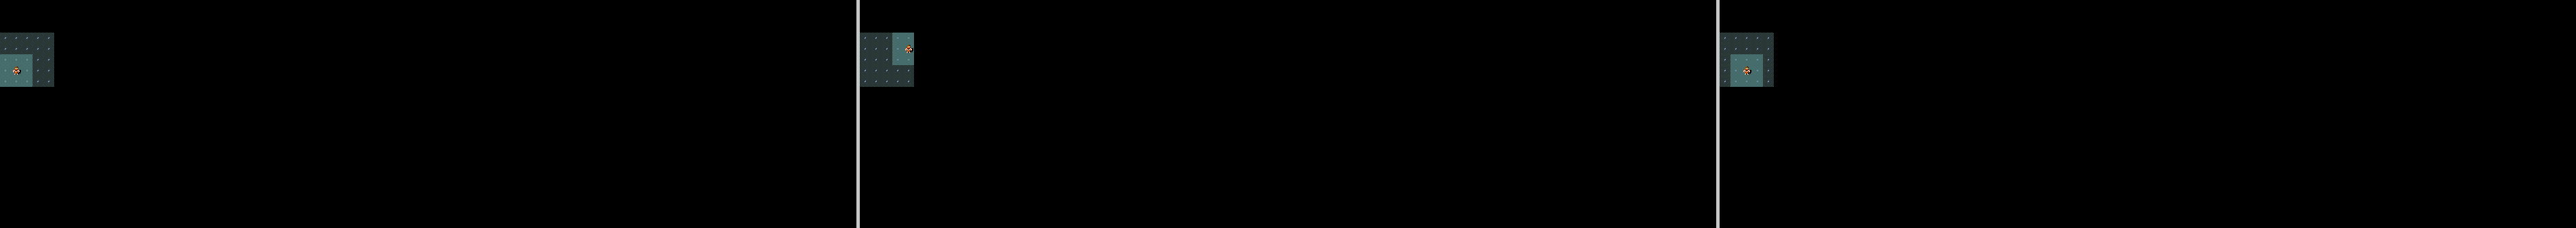

Levels with geometry: GEOMETRY:center,center


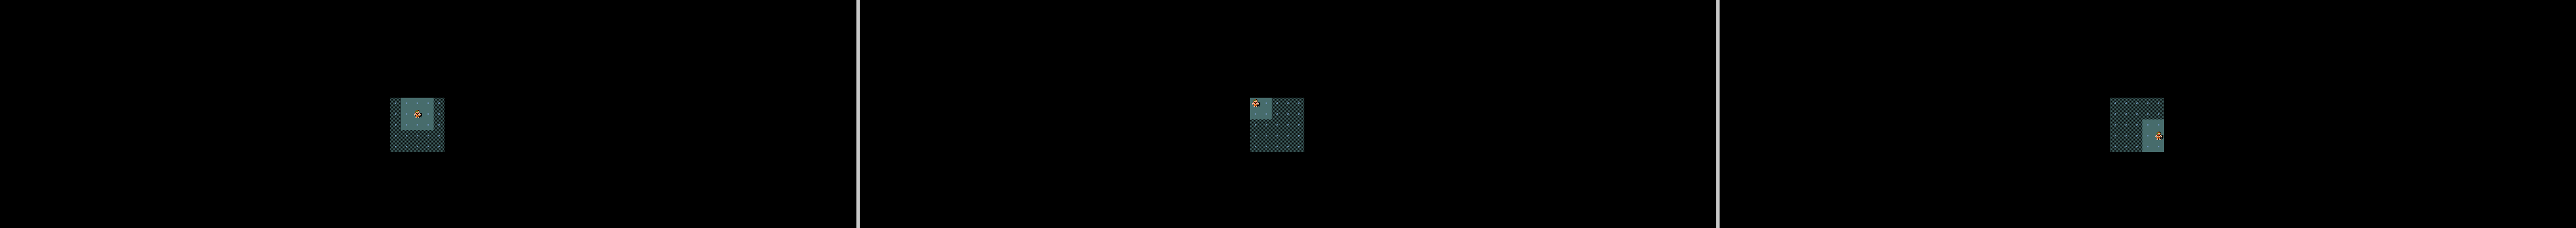

Levels with geometry: GEOMETRY:right,bottom


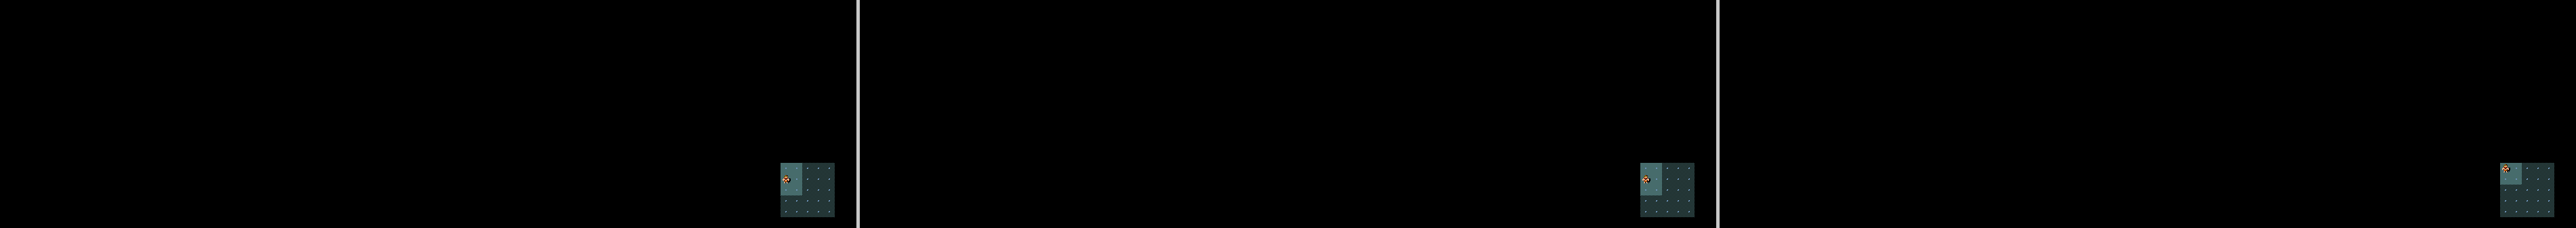

In [9]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:{},{}
MAP
.....
.....
.....
.....
.....
ENDMAP
"""
for geom_x, geom_y in [("left", "top"), ("center", "center"), ("right", "bottom")]:
    print("Levels with geometry: GEOMETRY:{},{}".format(geom_x, geom_y))
    render_des_file(des_file.format(geom_x, geom_y), n_images=3, full_screen=True)

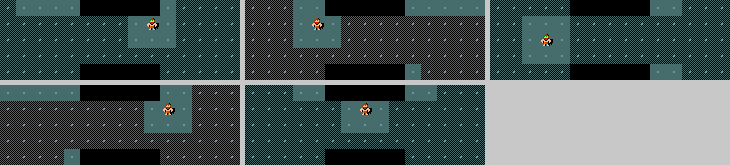

In [ ]:

# In NetHack/MiniHack environments, even with premapped levels, the environment is still typically partially observable

des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center # DEFINE THE POSITION OF THE WHOLE MAP 
MAP
.....     .....
...............
...............
...............
.....     .....
ENDMAP
"""
render_des_file(des_file, n_images=3)

In [ ]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
|-----     ------
|.....-- --.....|
|.T.T...-....K..|# t TREE . k TREASURE
|.......+.......|# + conjunction 
|.T.T...-.......|
|.....-----.....|
|-----     ------
ENDMAP
BRANCH: (3,3,3,3),(4,4,4,4)
"""
render_des_file(des_file, n_images=3, full_screen=False)

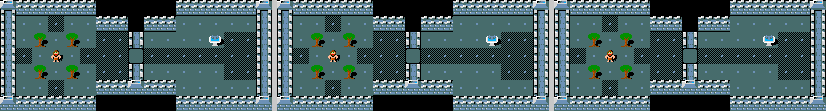

In [ ]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
|-----     ------
|.....-- --.....| # t TREE
|.......+.......| # + conjunction 
|.T.T...-.......|
|.....-----.....|
|-----     ------
ENDMAP
BRANCH: (3,3,3,3),(4,4,4,4)
"""
render_des_file(des_file, n_images=3, full_screen=False)

# Adding complexity: Monsters, Objects & Traps

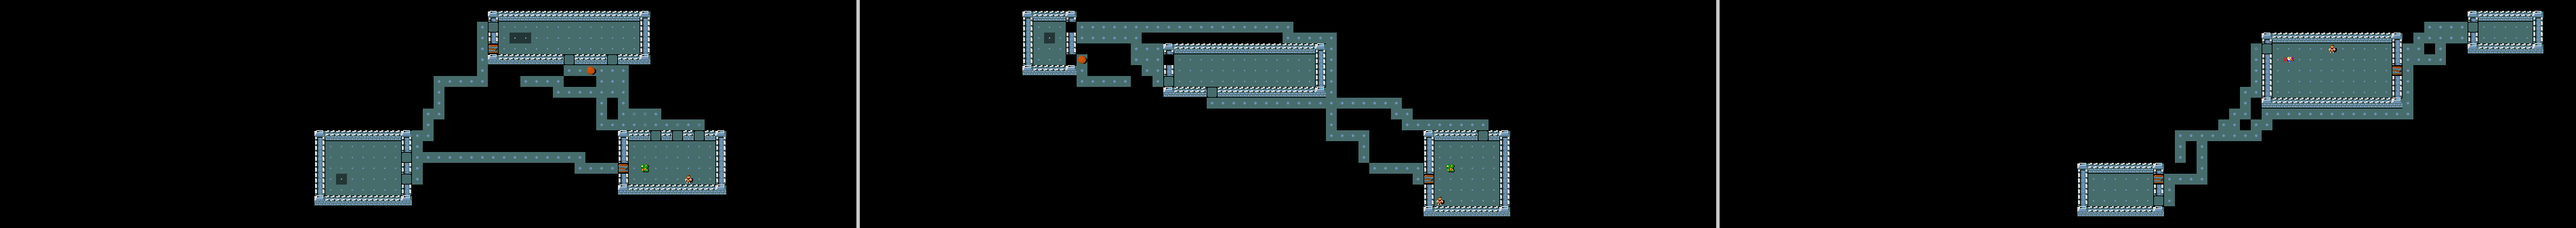

In [15]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    MONSTER: random, (1,1)
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "lichen"), (1,2)
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "red mold"), (1,3)
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

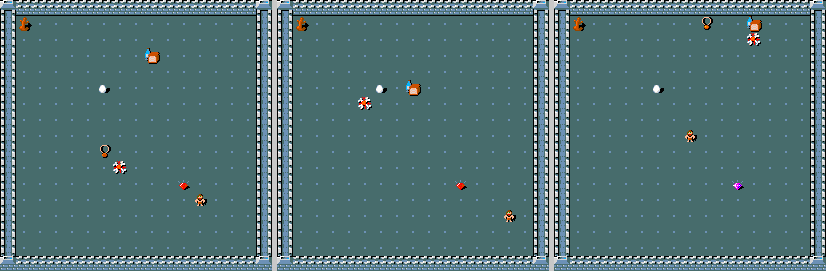

In [16]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary", lit, random, (center,center), (15,15) {
    OBJECT:('%', "food ration"), random
    OBJECT:'*', (10,10)
    OBJECT :('"', "amulet of life saving"), random
    OBJECT:('%', "corpse"), random
    OBJECT:('`', "statue"), (0,0), montype:"forest centaur", 1
    OBJECT:('(', "crystal ball"), (17,08), blessed, 5,name:"The Orb of Fate"
    OBJECT:('%',"egg"), (05,04), montype:"yellow dragon"
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3)

As well as objects placed with OBJECT, there are several terrain features it’s worth knowing about: SINK, FOUNTAIN, ALTAR, and STAIR. Stairs down are normally the objective for the level, as they lead deeper into the dungeon (unless you specify your own).

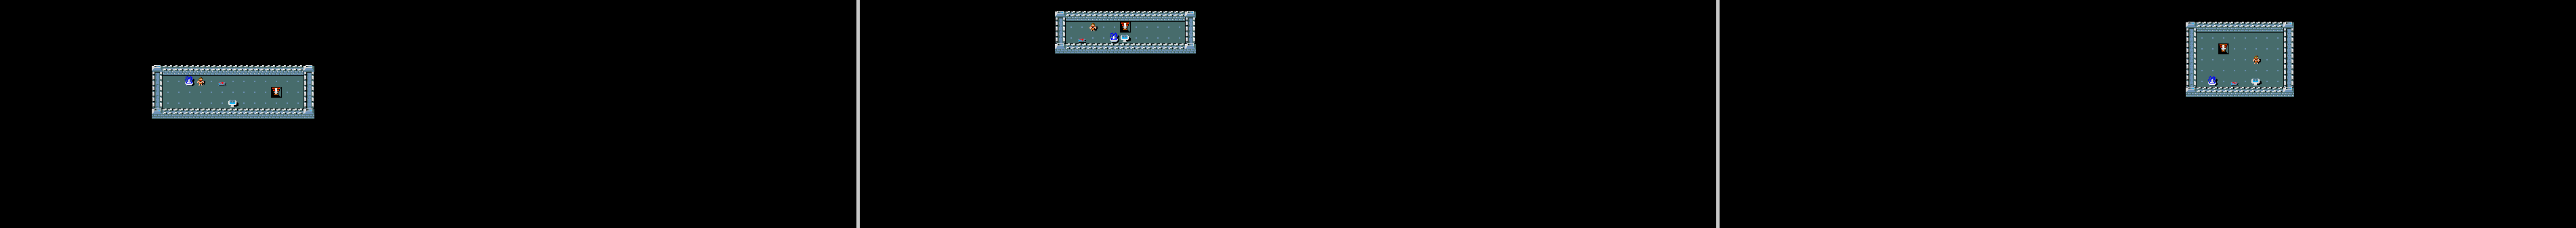

In [17]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    SINK: random
    FOUNTAIN: random
    ALTAR: random, random, random
    STAIR: random, down
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

# Landscaping Terrain: selections and coordinateS

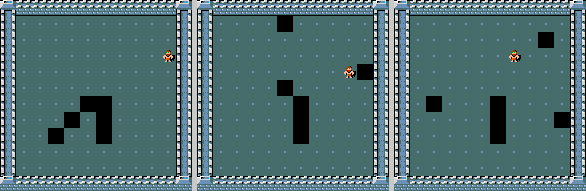

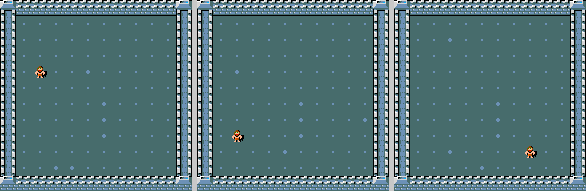

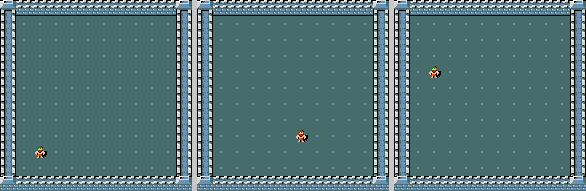

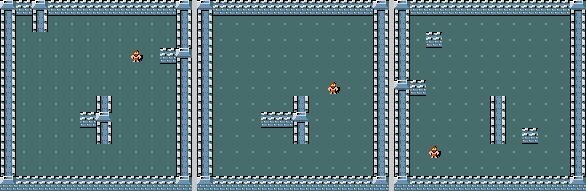

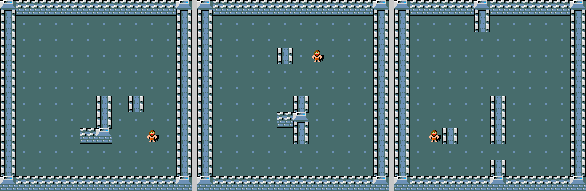

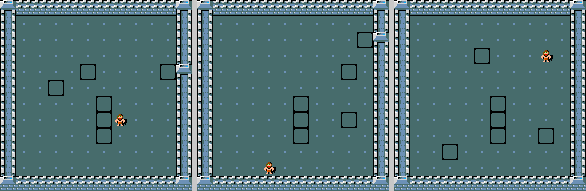

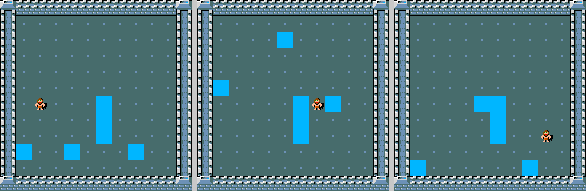

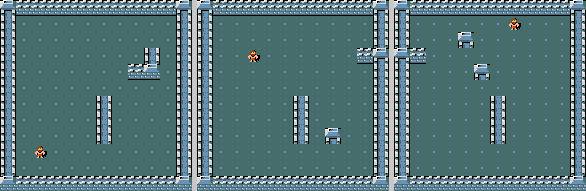

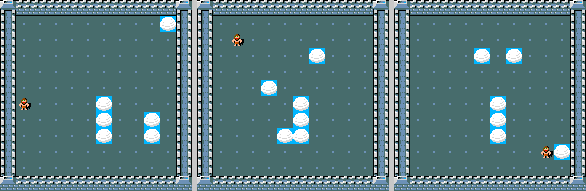

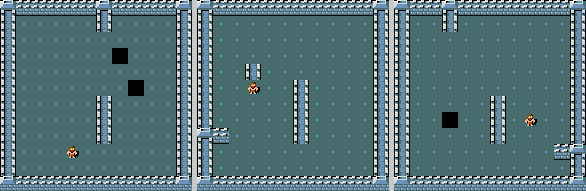

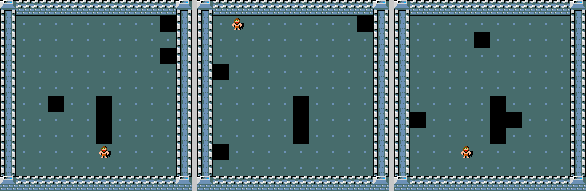

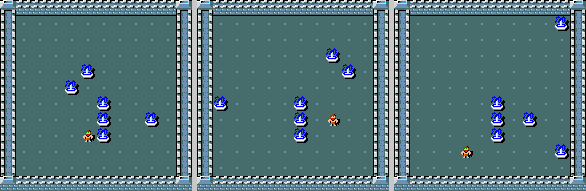

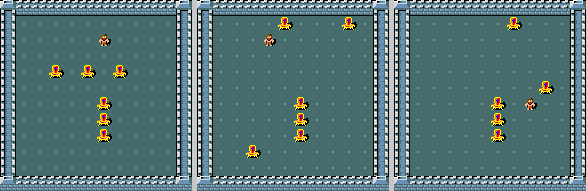

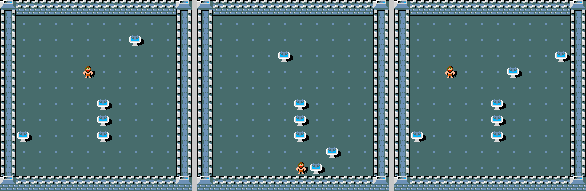

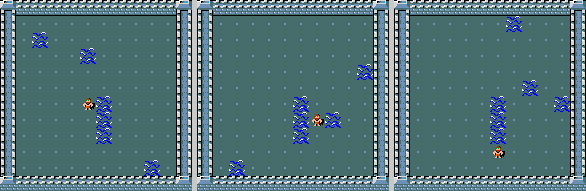

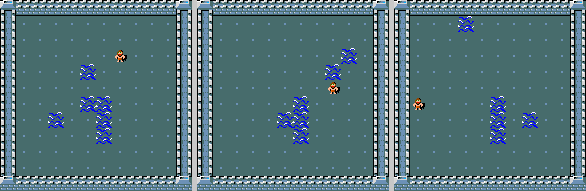

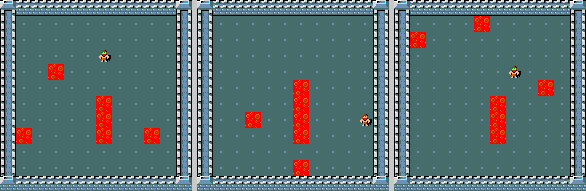

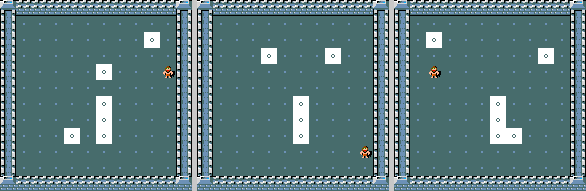

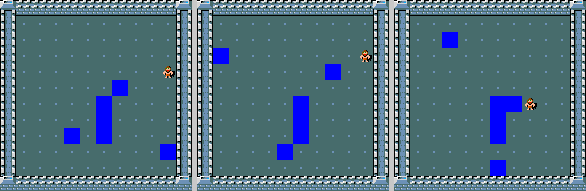

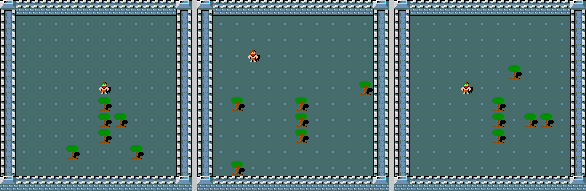

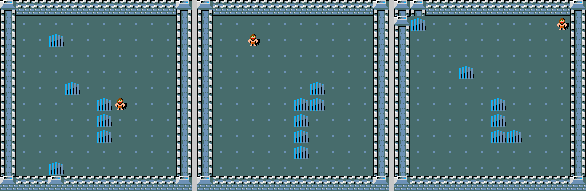

In [ ]:
# 定义地牢描述文件 (Define the dungeon description file)
des_file = """ 
LEVEL: "mylevel"                                    # 设置关卡名称 (Set level name)
FLAGS: premapped                                    # 设置地图预显示标志 (Set premapped flag)
REGION: (0,0,20,80), lit, "ordinary"               # 定义一个照明的普通区域 (Define a lit ordinary region)

ROOM: "ordinary" , lit, (3,3), random, (10,10) {   # 创建一个10x10的照明房间 (Create a 10x10 lit room)
    TERRAIN: (5,5), '%terrain%'                    # 在固定位置放置地形 (Place terrain at fixed position)
    TERRAIN: (5,6), '%terrain%'                    # 在固定位置放置地形 (Place terrain at fixed position)
    TERRAIN: (5,7), '%terrain%'                    # 在固定位置放置地形 (Place terrain at fixed position)
    TERRAIN: random, '%terrain%'                   # 随机位置放置地形 (Place terrain at random position)
    TERRAIN: random, '%terrain%'                   # 随机位置放置地形 (Place terrain at random position)
    TERRAIN: random, '%terrain%'                   # 随机位置放置地形 (Place terrain at random position)
}

RANDOM_CORRIDORS                                    # 生成随机走廊 (Generate random corridors)
"""

# 定义所有可用地形类型 (Define all available terrain types)
Terrains = [
    " ",  # 实心墙 (Solid wall)
    "#",  # 走廊 (Corridor)
    ".",  # 房间地板（除非用REGION命令点亮，否则不发光） (Room floor - unlit unless lit by REGION)
    "-",  # 横向墙 (Horizontal wall)
    "|",  # 纵向墙 (Vertical wall)
    "+",  # 门（状态由DOOR命令定义） (Door - state defined by DOOR command)
    "A",  # 空气 (Air)
    "B",  # 十字墙/边界符号 (Crosswall/boundary symbol)
    "C",  # 云 (Cloud)
    "S",  # 密门 (Secret door)
    "H",  # 密道 (Secret corridor)
    "{",  # 喷泉 (Fountain)
    "\\", # 王座 (Throne)
    "K",  # 水槽 (Sink)
    "}",  # 护城河 (Moat)
    "P",  # 水池 (Pool of water)
    "L",  # 岩浆池 (Lava pool)
    "I",  # 冰 (Ice)
    "W",  # 水 (Water)
    "T",  # 树 (Tree)
    "F",  # 铁栏 (Iron bars)
]

# 对每种地形类型生成地图并渲染3次 (Generate and render map 3 times for each terrain type)
for terrain in Terrains:
    render_des_file(des_file.replace("%terrain%", terrain), n_images=3, full_screen=False)

TRYING TO SET THE TERRAIN FEATURES IN A SPECIFIC POSITION 

Using fillrect


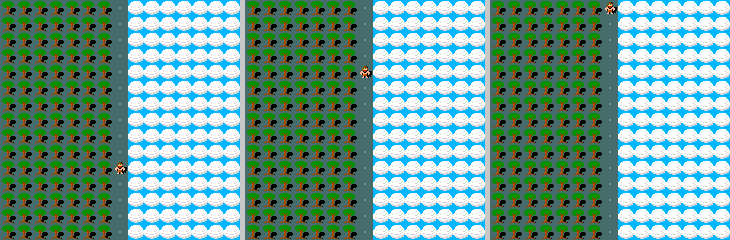

Using rect


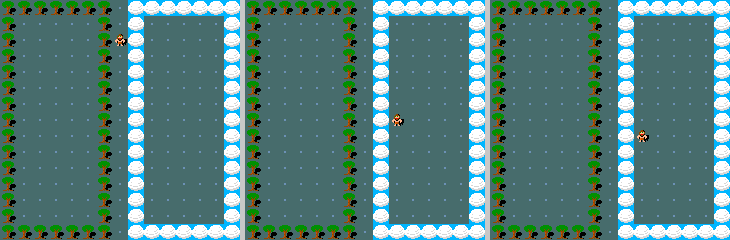

In [20]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$left = selection: %rect% (0,0,6,14)
$right = selection: %rect% (8,0,14,14)

TERRAIN: $left, 'T'
TERRAIN: $right, 'C'

"""
for rect in ("fillrect", "rect"):
    print(f"Using {rect}")
    render_des_file(des_file.replace("%rect%", rect), n_images=3)

We can select a single coordinate out of a selection using rndcoord as follows:

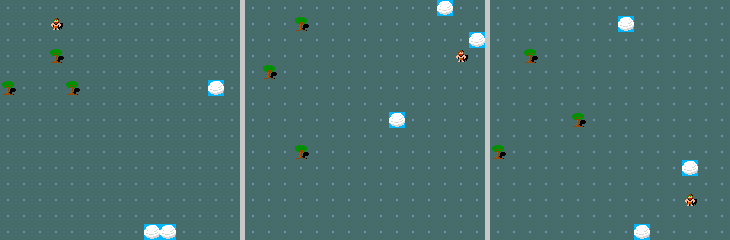

In [21]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$left = selection: fillrect (0,0,6,14)
$right = selection: fillrect (8,0,14,14)

TERRAIN: rndcoord($left), 'T'
TERRAIN: rndcoord($left), 'T'
TERRAIN: rndcoord($left), 'T'
TERRAIN: rndcoord($right), 'C'
TERRAIN: rndcoord($right), 'C'
TERRAIN: rndcoord($right), 'C'

"""
render_des_file(des_file.replace("%rect%", rect), n_images=3)

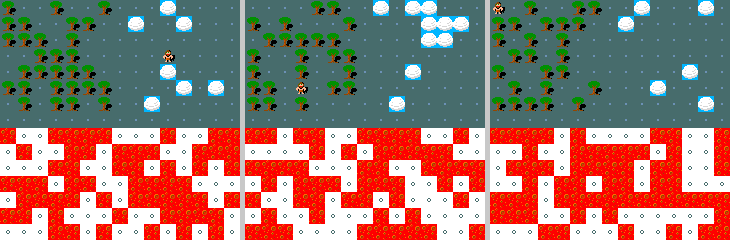

In [22]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$top_left_region = (0,0,6,6)
$top_right_region = (8,0,14,6)
$bottom_region = (0,8,14,14)

REPLACE_TERRAIN: $top_left_region, '.', 'T', 50%
REPLACE_TERRAIN: $top_right_region, '.', 'C', 20%

TERRAIN: fillrect $bottom_region, 'L'
REPLACE_TERRAIN: $bottom_region, 'L','I', 50%

"""
render_des_file(des_file, n_images=3)

Another way of generating selections (instead of *rect* or *fillrect*) is using *line* or* randline*. These both take a start and end position, and randline also takes a roughness parameter controlling how random the line is between the two coordinates. Here we generate a straight line of trees using line, and several different random lines of clouds with different roughnesses using randline

In [ ]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$top_left = (0,0)
$top_right = (14,0)
$bottom_middle = (7,14)

$tree_line = selection: line $top_left,$bottom_middle
$cloud_line = selection: randline $top_right,$bottom_middle,%roughness%

TERRAIN: $tree_line, 'T'
TERRAIN: $cloud_line, 'C'

"""
for roughness in (0,5,15,30):
    print(f"Using roughness {roughness}")
    render_des_file(des_file.replace("%roughness%", str(roughness)), n_images=3)

Controlling Randomness
As we’ve seen so far, there are many different ways of controlling randomness in des-files. We’ll cover them all in this section:

randline and rndcoord we’ve already seen. They’re ways of creating random selections or coordinates given some input

The des-file format supports conditional statements using the IF[...] command. Inside the square brackets can either be a percentage (e.g. IF[50%]) or a comparison (e.g. IF[4 < $variable])

dice-rolls can be used to generate random integers. They take the form MdN, which means to roll M N-sided die and sum the result (e.g. 2d4). These can be used in IF statements, like IF[2d4 < 6], or any other place an integer is used.

Arrays can be created in des-files, supporting lists of any object of the same type. The SHUFFLE command can be used to randomise the order of a list after it’s been created, and then the list can be accessed by index to get a random element.

Here we use IF[%50] conditionals to place either trees or clouds on the left of the map, and dice-rolls to randomly place lava or ice on the right. We use shuffle to randomly pick one monster, and a dice-roll to randomly pick another

In [ ]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$left = selection: fillrect (0,0,1,10)
$right = selection: fillrect (9,0,10,10)

IF [50%] {
    TERRAIN: $left, 'T'
} ELSE {
    TERRAIN: $left, 'C'
}

$roll = 2d6
IF [$roll < 7] {
    TERRAIN: $right, 'I'
} ELSE {
    TERRAIN: $right, 'L'
}

$mon_names = monster: { "Archon", "arch-lich", "vampire lord", "minotaur"}
SHUFFLE: $mon_names
MONSTER: $mon_names[0], (5,2), hostile

$mon_names_new = monster: { "Lich", "grid bug", "hell hound", "red mold"}
$mon_index = 1d4
MONSTER: $mon_names_new[$mon_index], (5,8), hostile
"""
render_des_file(des_file, n_images=12)

# TORCHBEAST 火焰巨兽
 NOT COVERED YET
 

# RL RAY LIB !!!!!!!




ppo

In [ ]:
# pip install "ray[rllib]" tensorflow torch

In [ ]:
from ray.rllib.algorithms.ppo import PPOConfig

config = (  # 1. Configure the algorithm,
    PPOConfig()
    .environment("Taxi-v3")
    .env_runners(num_env_runners=2)
    .framework("torch")
    .training(model={"fcnet_hiddens": [64, 64]})
    .evaluation(evaluation_num_env_runners=1)
)

algo = config.build()  # 2. build the algorithm,

for _ in range(5):
    print(algo.train())  # 3. train it,

algo.evaluate()  # 4. and evaluate it.

# TRY MINIHACK NAVIGATION 

In [23]:
# Copyright (c) Facebook, Inc. and its affiliates.

from minihack import MiniHack
from minihack.envs import register
from nle import nethack


MOVE_ACTIONS = tuple(nethack.CompassDirection)


class MiniHackNavigation(MiniHack):
    """The base class for MiniHack Navigation tasks.

    Navigation tasks have the following characteristics:

    - Restricted action space: By default, the agent can only move towards
      eight compass directions.
    - Yes/No questions, as well as menu-selection actions are disabled by
      default.
    - The character is set to chaotic human male rogue.
    - Auto-pick is enabled by default.
    - Maximum episode limit defaults to 100 (can be overriden via the
      `max_episode_steps` argument)
    - The default goal is to reach the stair down. This can be changed using
      a reward manager.
    """

    def __init__(self, *args, des_file: str = None, **kwargs):
        # Actions space - move only by default
        kwargs["actions"] = kwargs.pop("actions", MOVE_ACTIONS)
        # Disallowing one-letter menu questions
        kwargs["allow_all_yn_questions"] = kwargs.pop(
            "allow_all_yn_questions", False
        )
        # Perform known steps
        kwargs["allow_all_modes"] = kwargs.pop("allow_all_modes", False)
        # Play with Rogue character by default
        kwargs["character"] = kwargs.pop("character", "rog-hum-cha-mal")
        # Default episode limit
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 100)

        super().__init__(*args, des_file=des_file, **kwargs)



register(
    id="MiniHack-Navigation-Custom-v0",
    entry_point="minihack.navigation:MiniHackNavigation",
)

/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment MiniHack-Navigation-Custom-v0
  logger.warn(f"Overriding environment {id}")


In [24]:
# Copyright (c) Facebook, Inc. and its affiliates.
from minihack import MiniHackNavigation
from minihack.level_generator import PATH_DAT_DIR
from minihack.envs import register
from nle.nethack import Command
from nle import nethack
import os

MOVE_ACTIONS = tuple(nethack.CompassDirection)
APPLY_ACTIONS = tuple(list(MOVE_ACTIONS) + [Command.PICKUP, Command.APPLY])


class KeyRoomGenerator:
    def __init__(self, room_size, subroom_size, lit):
        des_path = os.path.join(PATH_DAT_DIR, "key_and_door_tmp.des")
        with open(des_path) as f:
            df = f.read()

        df = df.replace("RS", str(room_size))
        df = df.replace("SS", str(subroom_size))
        if not lit:
            df = df.replace("lit", str("unlit"))

        self.des_file = df

    def get_des(self):
        return self.des_file


class MiniHackKeyDoor(MiniHackNavigation):
    """Environment for "key and door" task."""

    def __init__(self, *args, des_file, **kwargs):
        kwargs["character"] = kwargs.pop("charachter", "rog-hum-cha-mal")
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 200)
        kwargs["actions"] = kwargs.pop("actions", APPLY_ACTIONS)
        kwargs["autopickup"] = kwargs.pop("autopickup", False)
        super().__init__(*args, des_file=des_file, **kwargs)

    def step(self, action: int):
        # If apply action is chosen
        if self.actions[action] == Command.APPLY:
            key_key = self.key_in_inventory("key")
            # if key is in the inventory
            if key_key is not None:
                # Check if there is a closed door nearby
                dir_key = self.get_object_direction("closed door")
                if dir_key is not None:
                    # Perform the following NetHack steps
                    self.nethack.step(Command.APPLY)  # press apply
                    self.nethack.step(ord(key_key))  # choose key from the inv
                    self.nethack.step(dir_key)  # select the door's direction
                    obs, done = self.nethack.step(ord("y"))  # press y
                    obs, done = self._perform_known_steps(
                        obs, done, exceptions=True
                    )
                    # Make sure the door is open
                    while True:
                        obs, done = self.nethack.step(dir_key)
                        obs, done = self._perform_known_steps(
                            obs, done, exceptions=True
                        )
                        if (
                            self.get_object_direction("closed door", obs)
                            is None
                        ):
                            break

        obs, reward, done, info = super().step(action)
        return obs, reward, done, info


class MiniHackKeyRoom(MiniHackKeyDoor):
    def __init__(self, *args, room_size, subroom_size, lit, **kwargs):
        lev_gen = KeyRoomGenerator(room_size, subroom_size, lit)
        des_file = lev_gen.get_des()
        super().__init__(*args, des_file=des_file, **kwargs)


class MiniHackKeyRoom5x5Fixed(MiniHackKeyDoor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, des_file="key_and_door.des", **kwargs)


class MiniHackKeyRoom5x5(MiniHackKeyRoom):
    def __init__(self, *args, **kwargs):
        super().__init__(
            *args, room_size=5, subroom_size=2, lit=True, **kwargs
        )


class MiniHackKeyRoom5x5Dark(MiniHackKeyRoom):
    def __init__(self, *args, **kwargs):
        super().__init__(
            *args, room_size=5, subroom_size=2, lit=False, **kwargs
        )


class MiniHackKeyRoom15x15(MiniHackKeyRoom):
    def __init__(self, *args, **kwargs):
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 400)
        super().__init__(
            *args, room_size=15, subroom_size=5, lit=True, **kwargs
        )


class MiniHackKeyRoom15x15Dark(MiniHackKeyRoom):
    def __init__(self, *args, **kwargs):
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 400)
        super().__init__(
            *args, room_size=15, subroom_size=5, lit=False, **kwargs
        )


register(
    id="MiniHack-KeyRoom-Fixed-S5-v0",
    entry_point="minihack.envs.keyroom:MiniHackKeyRoom5x5Fixed",
)
register(
    id="MiniHack-KeyRoom-S5-v0",
    entry_point="minihack.envs.keyroom:MiniHackKeyRoom5x5",
)
register(
    id="MiniHack-KeyRoom-S15-v0",
    entry_point="minihack.envs.keyroom:MiniHackKeyRoom15x15",
)
register(
    id="MiniHack-KeyRoom-Dark-S5-v0",
    entry_point="minihack.envs.keyroom:MiniHackKeyRoom5x5Dark",
)
register(
    id="MiniHack-KeyRoom-Dark-S15-v0",
    entry_point="minihack.envs.keyroom:MiniHackKeyRoom15x15Dark",
)

/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment MiniHack-KeyRoom-Fixed-S5-v0
  logger.warn(f"Overriding environment {id}")
/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment MiniHack-KeyRoom-S5-v0
  logger.warn(f"Overriding environment {id}")
/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment MiniHack-KeyRoom-S15-v0
  logger.warn(f"Overriding environment {id}")
/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment MiniHack-KeyRoom-Dark-S5-v0
  logger.warn(f"Overriding environment {id}")
/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment MiniHack-KeyRoom-Dark-S15-v0
  l

Visualizing environment with random actions...


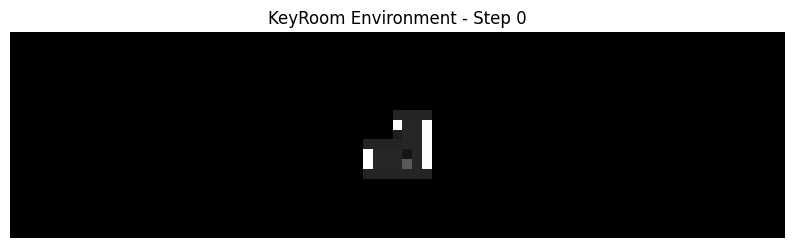

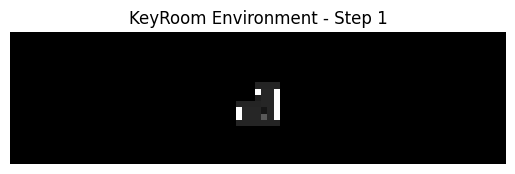

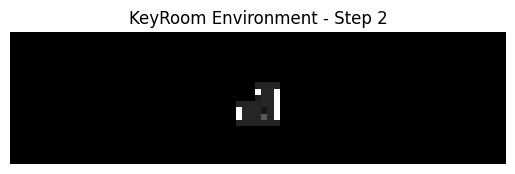

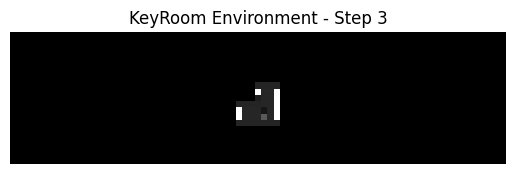

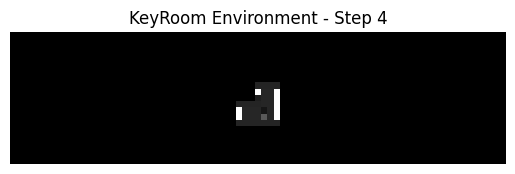

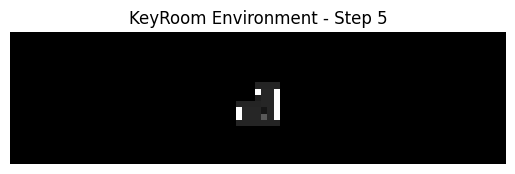

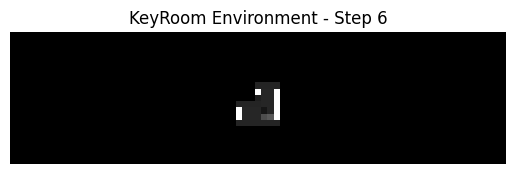

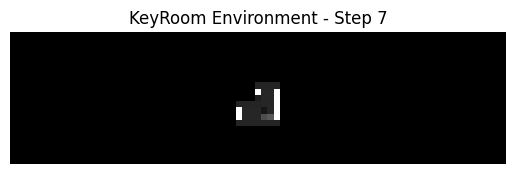

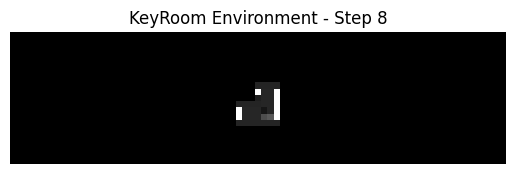

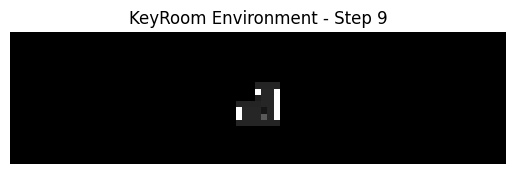

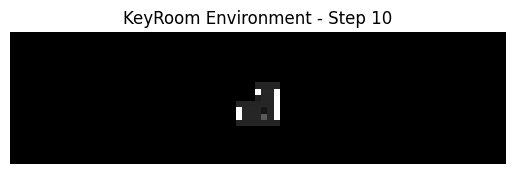

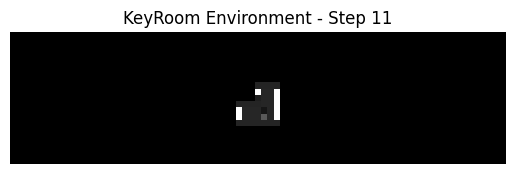

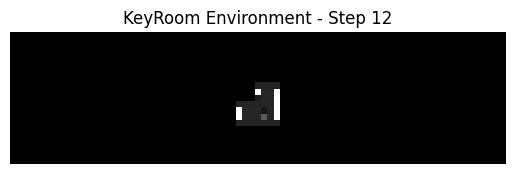

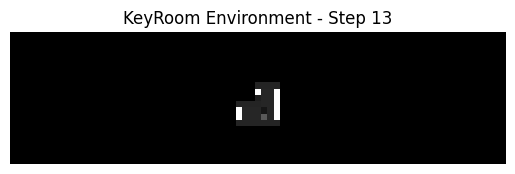

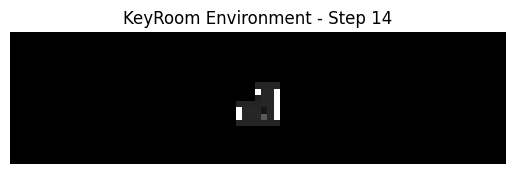

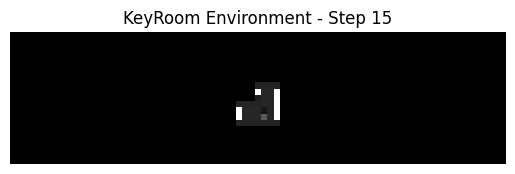

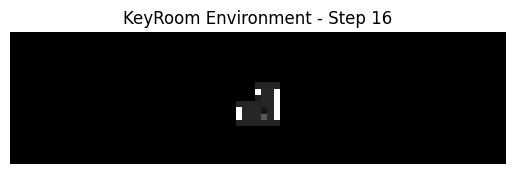

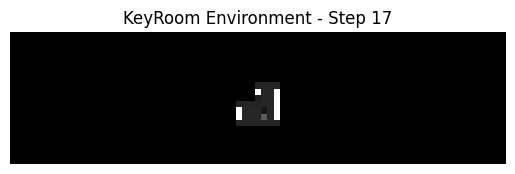

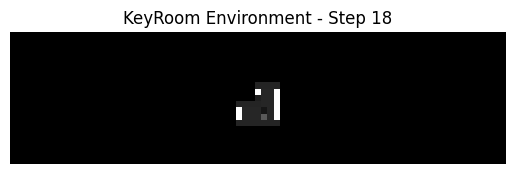

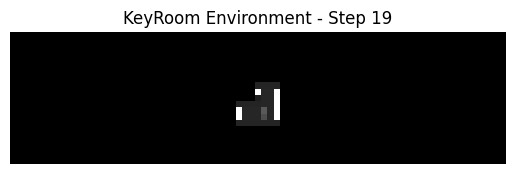

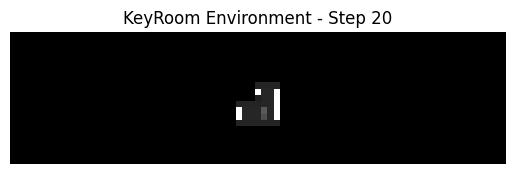

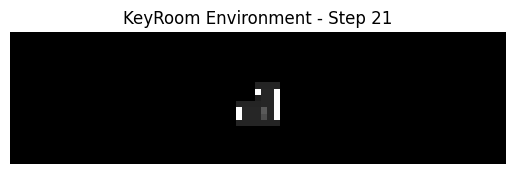

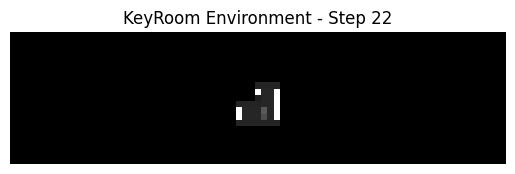

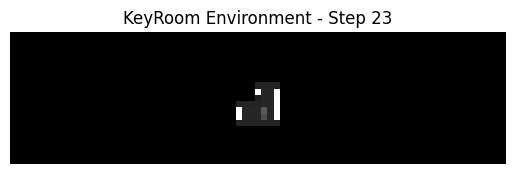

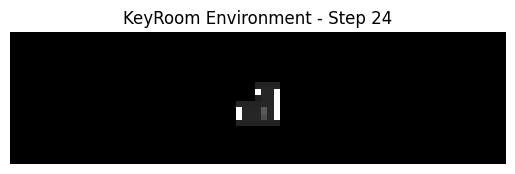

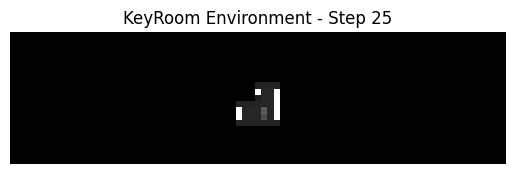

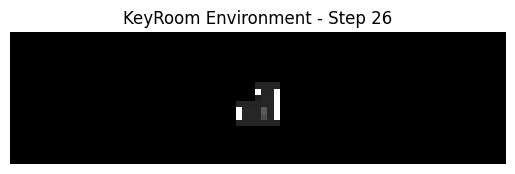

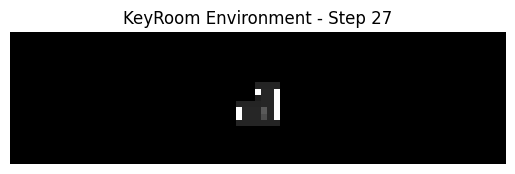

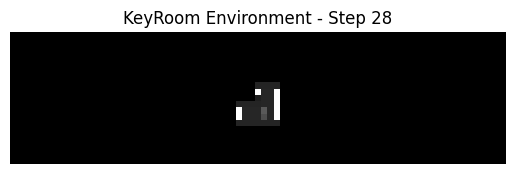

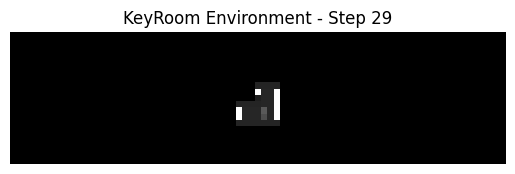

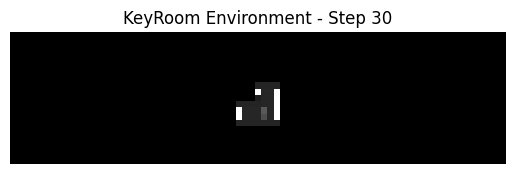

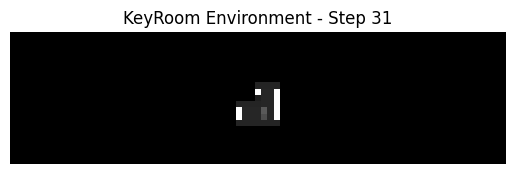

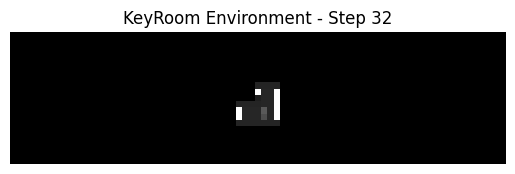

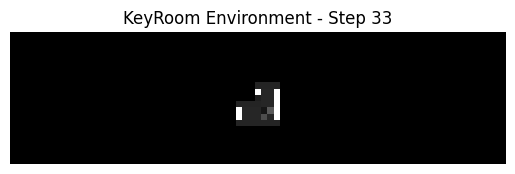

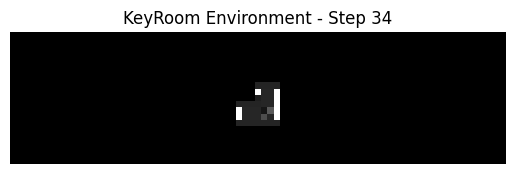

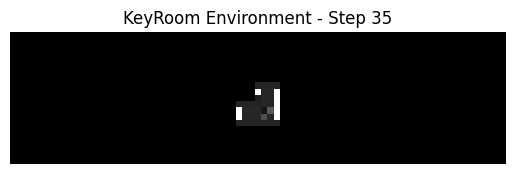

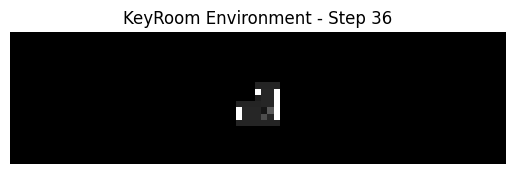

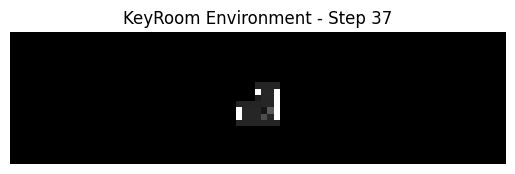

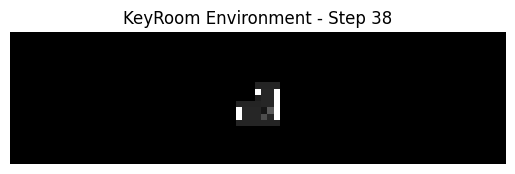

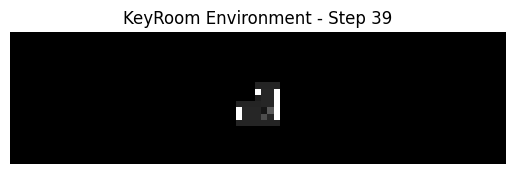

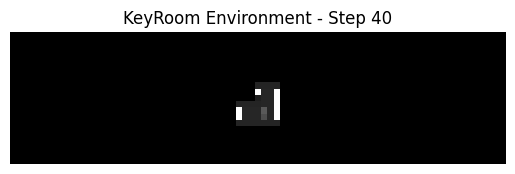

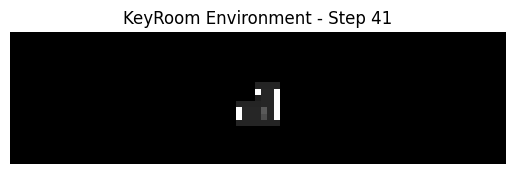

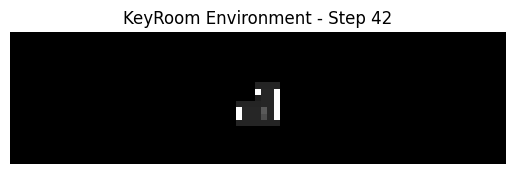

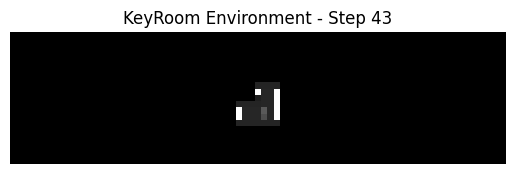

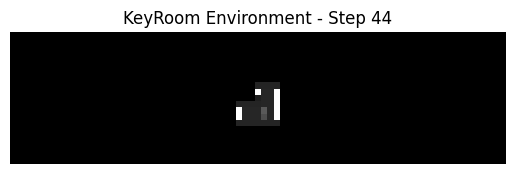

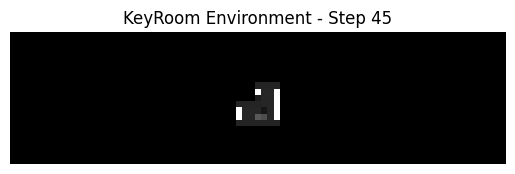

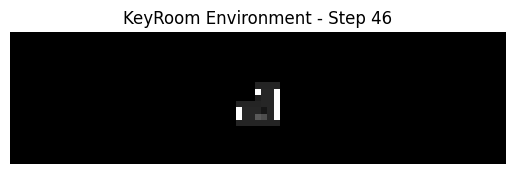

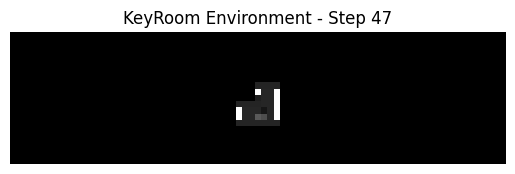

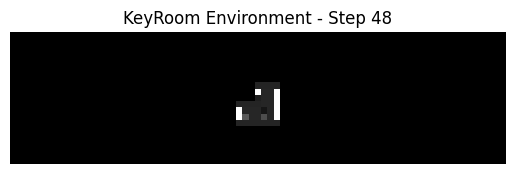

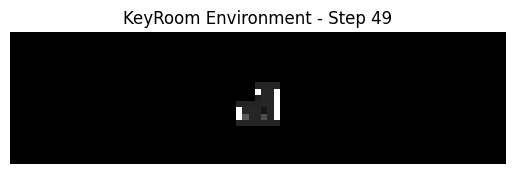

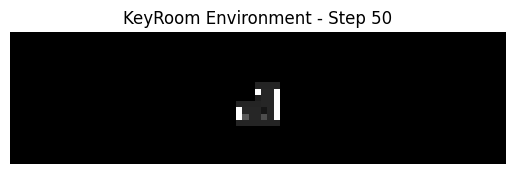

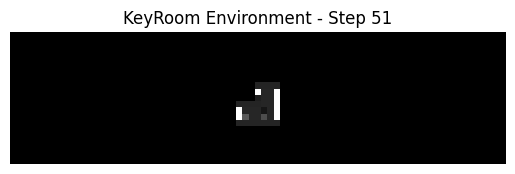

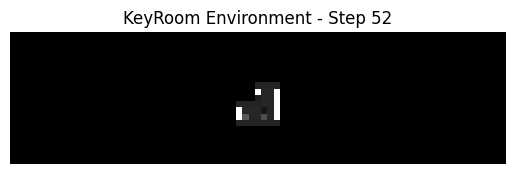

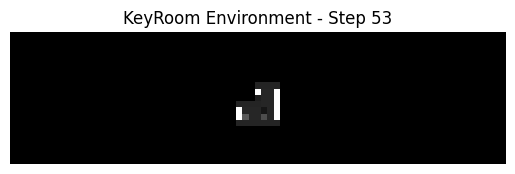

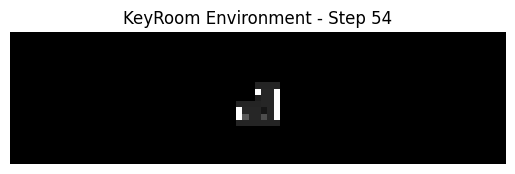

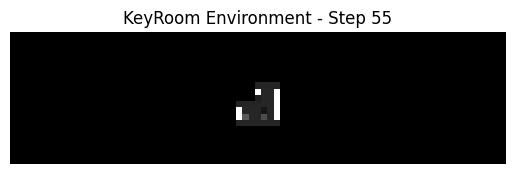

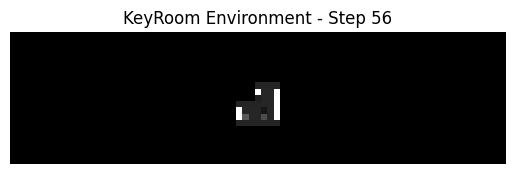

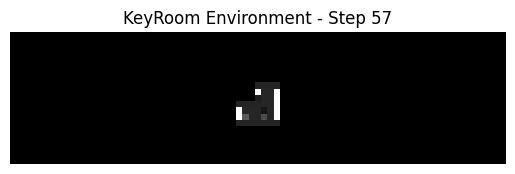

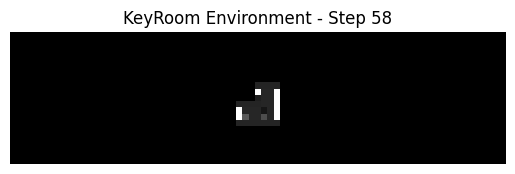

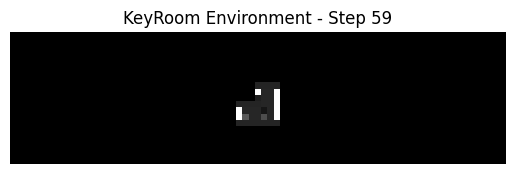

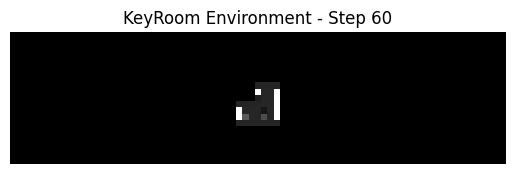

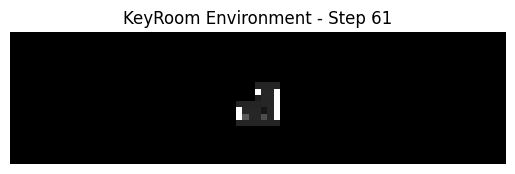

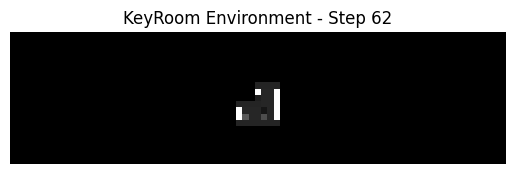

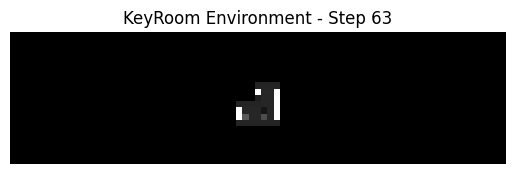

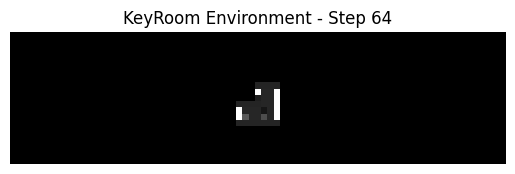

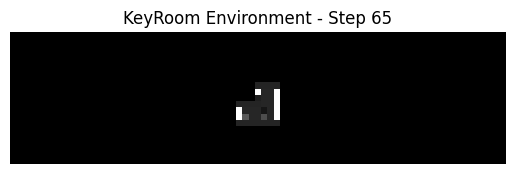

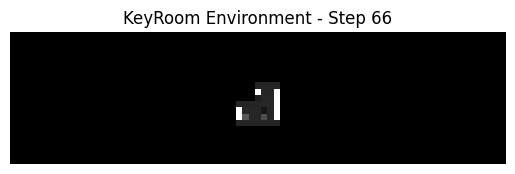

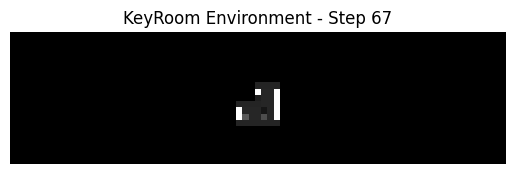

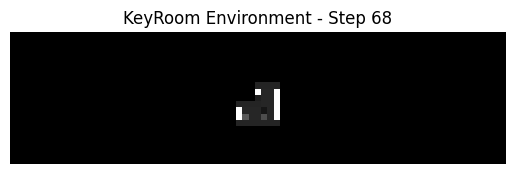

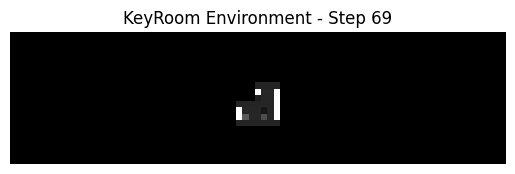

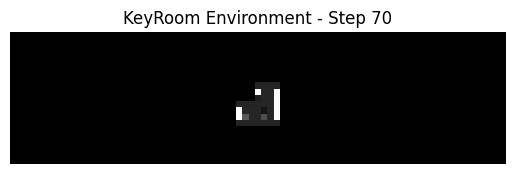

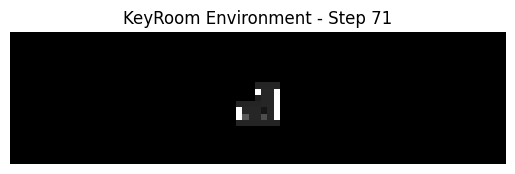

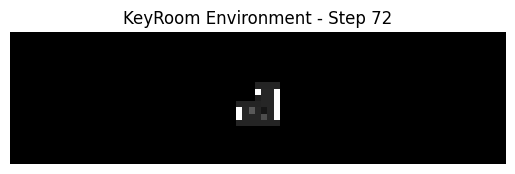

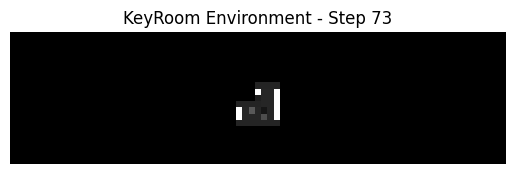

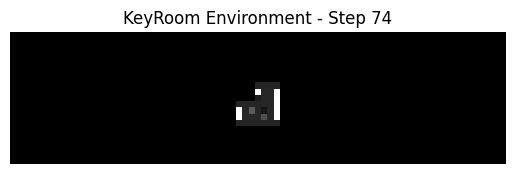

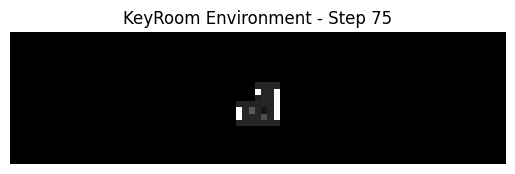

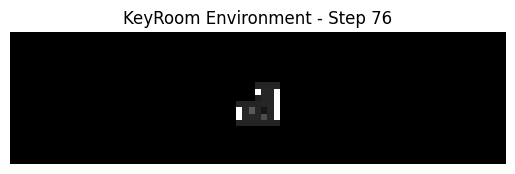

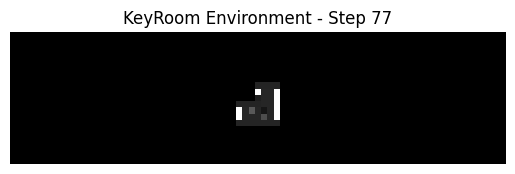

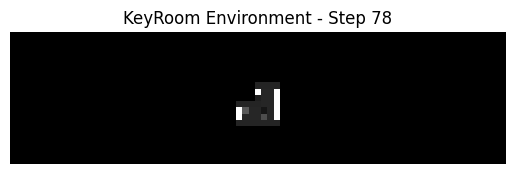

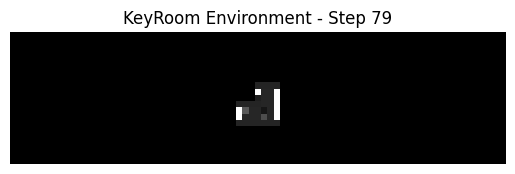

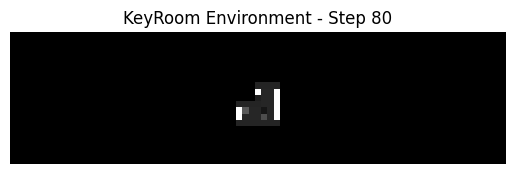

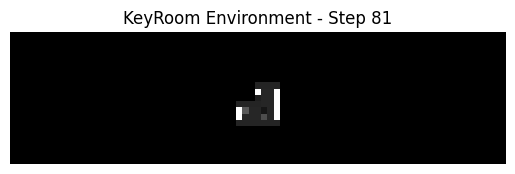

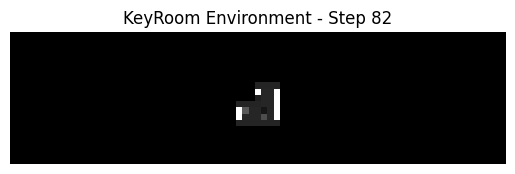

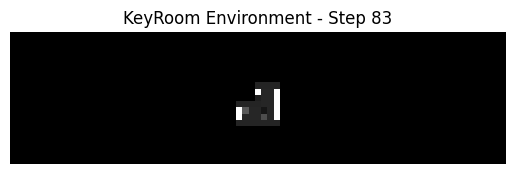

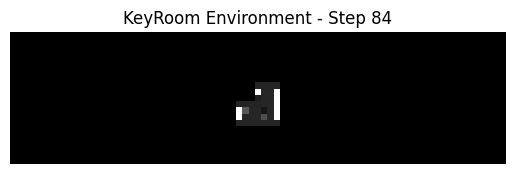

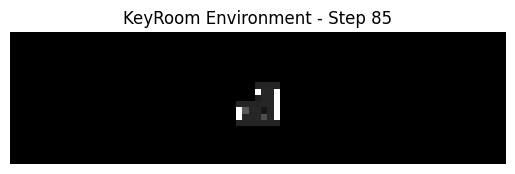

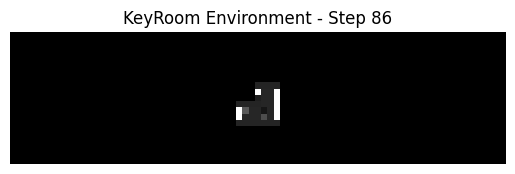

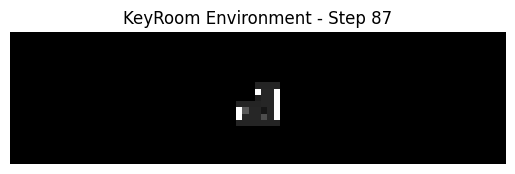

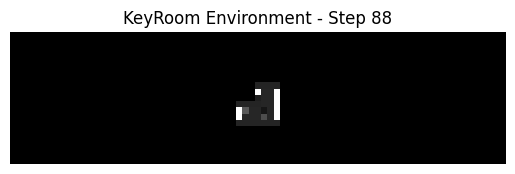

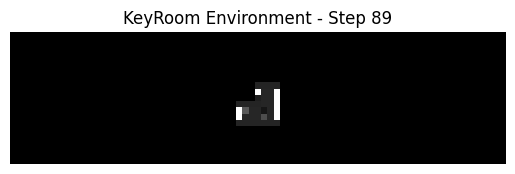

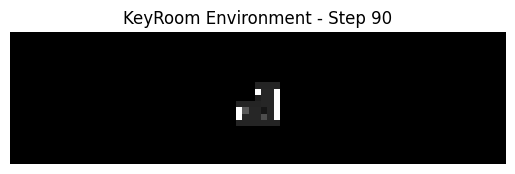

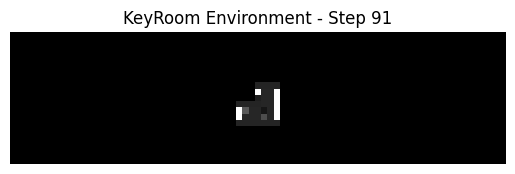

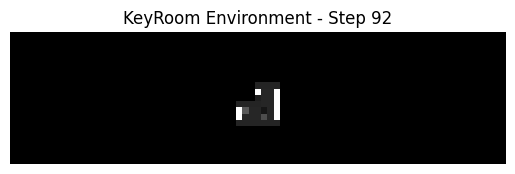

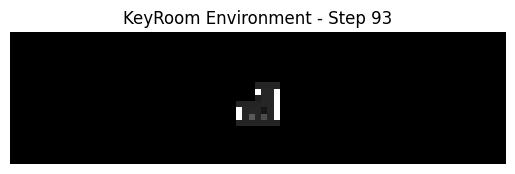

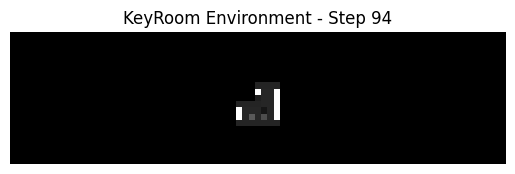

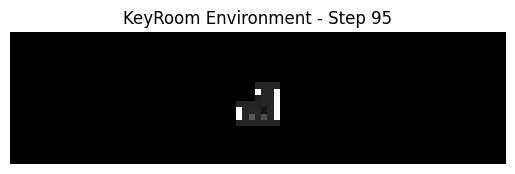

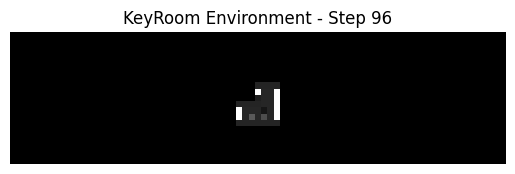

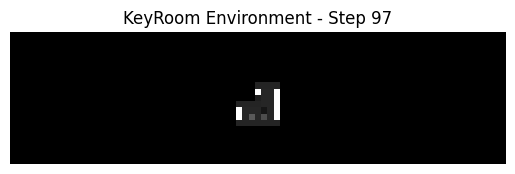

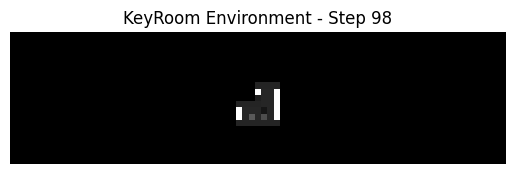

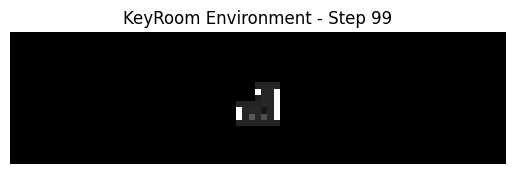

Starting PPO training...
Using cuda device


/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Logging to ./ppo_keyroom_tensorboard/PPO_1


/home/dovahkiin/anaconda3/envs/rl_1/lib/python3.9/site-packages/nle/env/base.py:602: UserWarning: Warning: smooth quitting of game failed, aborting.
  warnings.warn("Warning: smooth quitting of game failed, aborting.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.72    |
| time/              |          |
|    fps             | 1508     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.71       |
| time/                   |             |
|    fps                  | 861         |
|    iterations           | 2           |
|    time_elapsed         | 19          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014805412 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.44       |
|    explained_variance   | -0.0703     |
|    learning_rate        | 0.

KeyboardInterrupt: 

In [25]:
import gym
import minihack
import numpy as np
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecMonitor
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt

def create_env(env_id="MiniHack-KeyRoom-S5-v0"):
    """Create and wrap the MiniHack environment."""
    env = gym.make(
        env_id,
        observation_keys=("glyphs", "chars", "colors", "specials", "blstats"),
        actions=None,  # Use default action space
        autopickup=False,
    )
    return env

def visualize_env(env, num_steps=100):
    """Visualize the environment using a random agent."""
    obs = env.reset()
    plt.figure(figsize=(10, 10))
    
    for i in range(num_steps):
        plt.clf()
        # Display the chars observation (ASCII representation)
        plt.imshow(obs['chars'], cmap='gray')
        plt.title(f'KeyRoom Environment - Step {i}')
        plt.axis('off')
        plt.pause(0.1)
        
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        if done:
            obs = env.reset()
    
    plt.close()

def make_vec_env(env_id, num_envs=4):
    """Create vectorized environment for training."""
    def make_env():
        def _init():
            env = create_env(env_id)
            return env
        return _init
    
    vec_env = DummyVecEnv([make_env() for _ in range(num_envs)])
    vec_env = VecMonitor(vec_env)
    return vec_env

def train_ppo(env_id, total_timesteps=1000000):
    """Train PPO on the KeyRoom environment."""
    # Create vectorized environment
    vec_env = make_vec_env(env_id)
    
    # Create evaluation environment
    eval_env = make_vec_env(env_id, num_envs=1)
    
    # Initialize PPO agent
    model = PPO(
        "MultiInputPolicy",
        vec_env,
        verbose=1,
        learning_rate=3e-4,
        n_steps=2048,
        batch_size=64,
        n_epochs=10,
        gamma=0.99,
        gae_lambda=0.95,
        clip_range=0.2,
        tensorboard_log="./ppo_keyroom_tensorboard/"
    )
    
    # Setup evaluation callback
    eval_callback = EvalCallback(
        eval_env,
        best_model_save_path="./best_model",
        log_path="./logs/",
        eval_freq=10000,
        deterministic=True,
        render=False
    )
    
    # Train the agent
    model.learn(
        total_timesteps=total_timesteps,
        callback=eval_callback
    )
    
    # Save the final model
    model.save("ppo_keyroom_final")
    
    return model

def evaluate_model(model, env, num_episodes=10):
    """Evaluate trained model."""
    episode_rewards = []
    
    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            total_reward += reward
            
        episode_rewards.append(total_reward)
        print(f"Episode {episode + 1}: Reward = {total_reward}")
    
    return np.mean(episode_rewards), np.std(episode_rewards)

def main():
    # Environment setup
    env_id = "MiniHack-KeyRoom-S5-v0"
    env = create_env(env_id)
    
    # Visualize environment
    print("Visualizing environment with random actions...")
    visualize_env(env)
    
    # Train PPO
    print("Starting PPO training...")
    model = train_ppo(env_id)
    
    # Evaluate trained model
    print("Evaluating trained model...")
    mean_reward, std_reward = evaluate_model(model, env)
    print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")
    
    env.close()

if __name__ == "__main__":
    main()